In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import tensorflow as tf
from PIL import Image

In [2]:
def img_cls(folder):
    img = []
    cls = []
    filename = []
    for i in os.listdir(folder):
        
        x = 20
        for file in os.listdir(os.path.join(folder, i)):
            img_path = os.path.join(folder, i, file)
            filename.append(img_path)
            while x > 0:               
                
                #one_img = np.resize(np.array(Image.open(img_path)), (224, 224, 3)).astype('float32')/255
                image = np.array(Image.open(img_path).resize((224,224))).astype('float32')/255
#                 image = Image.open(img_path)
#                 image = np.array(image)
#                 image = image.resize((224, 224, 3))
#                 image = image.astype('float32')/255
                img.append(image)
                cls.append(i)
                x -= 1
    return img, cls, filename

In [3]:
img_data, cls_data, filename = img_cls('C:/Users/gc/Documents/GA/Projects/Project_5/imag')

In [4]:
img_data

[array([[[0.28627452, 0.2627451 , 0.25882354],
         [0.2901961 , 0.25490198, 0.2509804 ],
         [0.29411766, 0.25490198, 0.2509804 ],
         ...,
         [0.47058824, 0.42352942, 0.41960785],
         [0.4745098 , 0.43137255, 0.41960785],
         [0.48235294, 0.4392157 , 0.42352942]],
 
        [[0.28235295, 0.24705882, 0.23529412],
         [0.29803923, 0.26666668, 0.25490198],
         [0.30588236, 0.26666668, 0.25882354],
         ...,
         [0.49019608, 0.45490196, 0.4392157 ],
         [0.49019608, 0.45490196, 0.43529412],
         [0.49411765, 0.45882353, 0.43529412]],
 
        [[0.28235295, 0.2627451 , 0.23921569],
         [0.3019608 , 0.28235295, 0.25882354],
         [0.3137255 , 0.28235295, 0.2627451 ],
         ...,
         [0.49019608, 0.4509804 , 0.44705883],
         [0.4862745 , 0.44705883, 0.4392157 ],
         [0.5019608 , 0.46666667, 0.4509804 ]],
 
        ...,
 
        [[0.04705882, 0.01960784, 0.04705882],
         [0.04705882, 0.02352941, 0.04705

In [5]:
cls_data

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '89',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9'

In [6]:
#filename

In [7]:
reshaped_img = [image.reshape(1, 224, 224, 3) for image in img_data]

In [8]:
reshaped_img[0].shape

(1, 224, 224, 3)

In [9]:
preprocessed_img = [preprocess_input(image) for image in reshaped_img]


In [10]:
preprocessed_img[0]

array([[[[-103.680176, -116.51625 , -123.39372 ],
         [-103.68802 , -116.52409 , -123.3898  ],
         [-103.68802 , -116.52409 , -123.38588 ],
         ...,
         [-103.519394, -116.35547 , -123.20941 ],
         [-103.519394, -116.347626, -123.20549 ],
         [-103.51547 , -116.33978 , -123.19765 ]],

        [[-103.70371 , -116.531944, -123.397644],
         [-103.6841  , -116.51233 , -123.38196 ],
         [-103.680176, -116.51233 , -123.374115],
         ...,
         [-103.49979 , -116.3241  , -123.189804],
         [-103.50371 , -116.3241  , -123.189804],
         [-103.50371 , -116.320175, -123.18588 ]],

        [[-103.69979 , -116.51625 , -123.397644],
         [-103.680176, -116.49664 , -123.37804 ],
         [-103.676254, -116.49664 , -123.36627 ],
         ...,
         [-103.49194 , -116.32802 , -123.189804],
         [-103.49979 , -116.33194 , -123.193726],
         [-103.48802 , -116.31233 , -123.17804 ]],

        ...,

        [[-103.891945, -116.75939 , -1

In [11]:
# load pre-trained model
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [12]:

features = [model.predict(image, use_multiprocessing=True) for image in preprocessed_img]

In [13]:
features = np.array(features)

In [14]:
features_reshape = features.reshape(-1, 4096)

In [15]:
features_reshape.shape

(180, 4096)

In [16]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=20, random_state=22)
pca.fit(features_reshape)
x = pca.transform(features_reshape)

In [17]:
x

array([[-4.8469889e-01,  2.9823372e-01, -1.1058498e-01, ...,
         2.5029294e-09, -1.3969839e-09,  5.5879354e-09],
       [-4.8469889e-01,  2.9823372e-01, -1.1058498e-01, ...,
         2.5029294e-09, -1.3969839e-09,  5.5879354e-09],
       [-4.8469889e-01,  2.9823372e-01, -1.1058498e-01, ...,
         2.5029294e-09, -1.3969839e-09,  5.5879354e-09],
       ...,
       [-9.9940002e-02,  6.6447154e-02,  2.9621128e-02, ...,
         2.0954758e-09, -8.1490725e-10, -2.1536835e-09],
       [-9.9940002e-02,  6.6447154e-02,  2.9621128e-02, ...,
        -1.2805685e-09,  5.5297278e-10, -6.4028427e-10],
       [-9.9940002e-02,  6.6447154e-02,  2.9621128e-02, ...,
        -1.2805685e-09,  5.5297278e-10, -6.4028427e-10]], dtype=float32)

In [18]:
# cluster feature vectors
kmeans = KMeans(n_clusters=20,n_jobs=-1, random_state=22)
kmeans.fit(x)

C:\Users\gc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-18-2e9c6d0ba08b>:3: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  kmeans.fit(x)


KMeans(n_clusters=20, n_jobs=-1, random_state=22)

In [19]:
kmeans.labels_

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [20]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filename,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    print(len(files))
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [21]:
print(groups[0])

['C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\85b54ada86ad738c.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\85b866bc7a455aa5.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\85ef99452ac114fe.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\8623ff57603ed10c.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\863f99e01ff0cc1c.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\866438b8d647cfe1.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\867fd099bd932530.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\868639797952563d.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\8693686d5a1f955a.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\8696b969cfb43630.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\86a6324bd93786f2.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\86ae7df152c22f24.jpg', 'C:/Users/gc/Documents/GA/Projects/Project_5/imag\\1\\86b91f637c47590a.jpg'

20


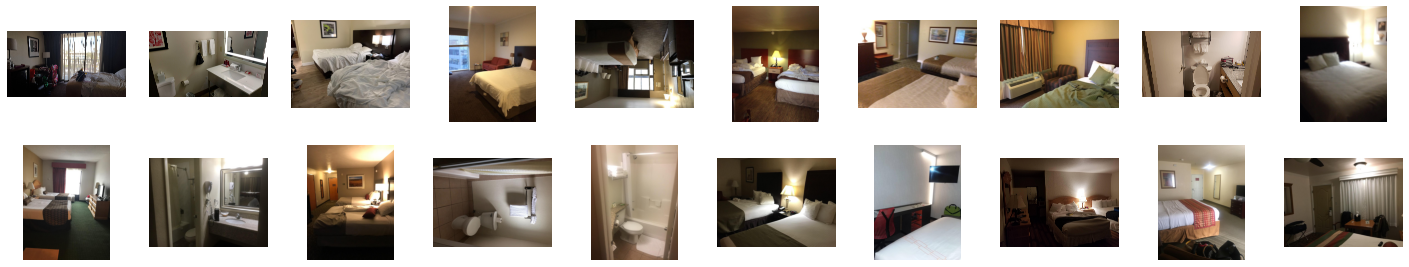

In [22]:
view_cluster(1)